In [1]:
from keras.models import load_model
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.applications.resnet50 import preprocess_input
from keras.models import Model
from keras.utils import plot_model
import matplotlib.pyplot as plt
import numpy as np
import json
import ast
import os

Using TensorFlow backend.


In [2]:
# Define here the model's directory you want to test
dir_path = "weights/Questao7/modelo13"
model_path = os.path.join(dir_path, "best_model.h5")
model = load_model(model_path)

In [3]:
batch_size = 32
input_shape = (224, 224, 3)
(w, h, _) = input_shape

test_folder = "Dataset/flower_photos/test"
test_aug = ImageDataGenerator(preprocessing_function=preprocess_input)

test_generator = test_aug.flow_from_directory(test_folder,  
                                         target_size=(w, h),  batch_size=batch_size,  
                                         class_mode='categorical', shuffle=True, seed=42)
scoreSeg = model.evaluate_generator(test_generator)

Found 175 images belonging to 5 classes.


In [4]:
print(model.metrics_names)
print(scoreSeg)

['loss', 'accuracy']
[0.528789222240448, 0.8399999737739563]


In [15]:
def graph_training_history(history):
    acc_train = history['accuracy']
    acc_test = history['val_accuracy']
    loss_train = history['loss']
    loss_test = history['val_loss']
    #print(acc_train, acc_test, loss_train, loss_test)
    plt.rcParams['axes.facecolor']='white'
    plt.figure(1)

    # summarize history for accuracy
    plt.subplot(121)
    plt.plot(acc_train)
    plt.plot(acc_test)
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.tight_layout()

    # summarize history for loss
    plt.subplot(122)
    plt.plot(loss_train)
    plt.plot(loss_test)
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper right')
    plt.tight_layout()
    
    plt.show()

In [21]:
json_path = os.path.join(dir_path, "history_model.json")
with open(json_path, 'r') as f:
    hist = json.load(f)

if( isinstance(hist, str) == True):
    history = ast.literal_eval(hist)
else:
    history = hist

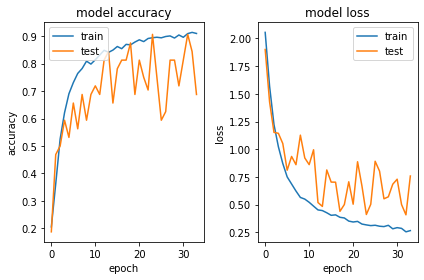

In [22]:
graph_training_history(history)

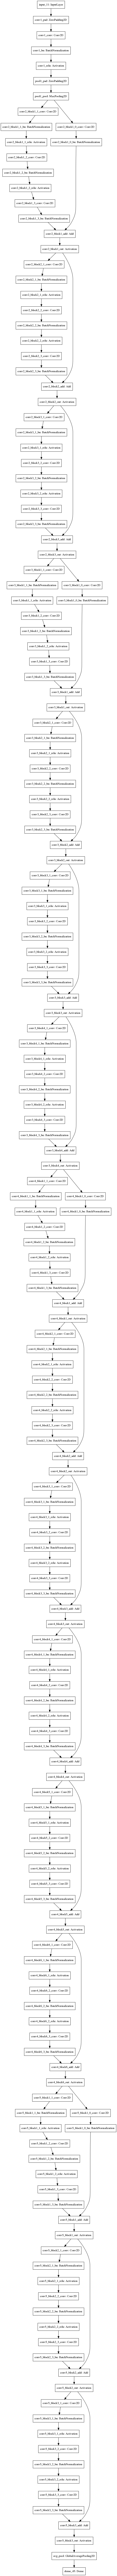

In [24]:
plot_model(model, to_file='model.png')